# Task2

#### 1- Develop an SVM classifier for the dataset.

In [196]:
import pandas as pd
from time import time
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import preprocessing
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [197]:
X_train = pd.read_csv('14cancer.xtrain', delim_whitespace = True, header = None)
X_train = X_train.T
X_train.shape

(144, 16063)

In [198]:
X_test = pd.read_csv('14cancer.xtest', delim_whitespace = True, header = None)
X_test = X_test.T
X_test.shape

(54, 16063)

In [199]:
Y_train = pd.read_csv('14cancer.ytrain', delim_whitespace = True, header = None)
Y_train = Y_train.T
Y_train.shape

(144, 1)

In [200]:
Y_test = pd.read_csv('14cancer.ytest', delim_whitespace = True, header = None)
Y_test = Y_test.T
Y_test.shape

(54, 1)

##### Shuffle data to enhance performance

In [201]:
# concatinate X and Y for shuffeling
data_train = pd.concat([X_train,Y_train], axis=1)
data_test = pd.concat([X_test,Y_test], axis=1)

# shuffle training and testing sets
data_train = data_train.sample(frac=1).reset_index(drop=True)
data_test = data_test.sample(frac=1).reset_index(drop=True)

In [202]:
# split X and Y again after shuffeling
X_train = np.array(data_train)[:, :-1]
Y_train = np.array(data_train)[:, -1:]

X_test = np.array(data_test)[:, :-1]
Y_test = np.array(data_test)[:, -1:]


##### b.  Automate your code to attempt principal component numbers in the range of 90 to125 with step size 5.

In [203]:
# defined function to find mean values of a list
def getMean( scores_list ):
    sum = 0
    for s in scores_list: 
        sum += s
        sum/len(scores_list)
    return sum/len(scores_list)

In [204]:
#Getting the training and testing scores for the best classfier after trying different values of principal components
n_components = np.arange(90, 130, 5)
mean_training_scores = []
mean_testing_scores = []
test_scores = []

for n in n_components :
    # Compute a PCA on the cancer gene dataset
    pca = PCA(n_components=n, svd_solver='randomized',
              whiten=True).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca= pca.transform(X_test)
    
    # Train a SVM classification model
    param_grid = {'C': [1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],}
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, return_train_score=True)  
    clf = clf.fit(X_train_pca, Y_train.flatten())
    mean_training_scores.append(getMean(clf.cv_results_['mean_train_score']))
    mean_testing_scores.append(getMean(clf.cv_results_['mean_test_score']))
    test_scores.append( clf.score(X_test_pca, Y_test))
print("Number of principal components used:\n", n_components, "\n")
print("corresponding mean training scores:\n", mean_training_scores, "\n")
print("corresponding mean testing scores:\n", mean_testing_scores, "\n")
print("corresponding test scores: \n", test_scores)

Number of principal components used:
 [ 90  95 100 105 110 115 120 125] 

corresponding mean training scores:
 [0.9307245896583097, 0.932439253477329, 0.9332652427499122, 0.9344623049063979, 0.935776915987882, 0.9367906229661757, 0.9385310556054186, 0.9395504053523643] 

corresponding mean testing scores:
 [0.39351851851851855, 0.3744212962962963, 0.3469328703703705, 0.3282696759259259, 0.2913773148148148, 0.27228009259259267, 0.25043402777777773, 0.22931134259259264] 

corresponding test scores: 
 [0.5370370370370371, 0.5925925925925926, 0.6111111111111112, 0.6481481481481481, 0.7222222222222222, 0.6481481481481481, 0.6111111111111112, 0.7037037037037037]


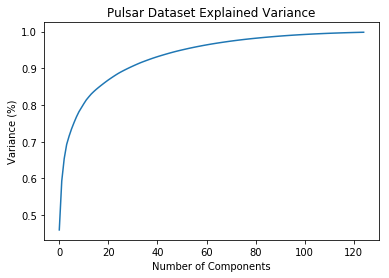

In [205]:
#Plotting the Cumulative Summation of the Explained Variance for the last computed pca (125 components)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

#### Plot the training and test scores for the best classifier vs. the number of principal components.

<function matplotlib.pyplot.show(*args, **kw)>

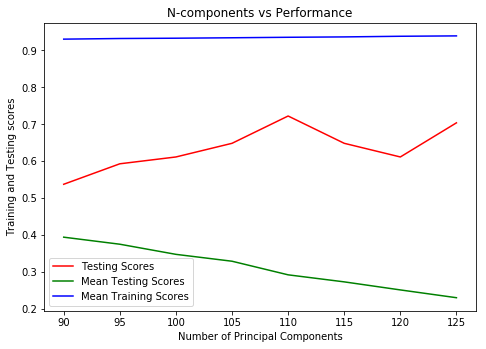

In [206]:
fig = plt.figure()
ax = fig.add_axes([0.2,0.2,1,1])
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Training and Testing scores')
ax.set_title('N-components vs Performance')
ax.plot(n_components, test_scores, c='r', label='Testing Scores')
ax.plot(n_components, mean_testing_scores, c='g', label='Mean Testing Scores')
ax.plot(n_components, mean_training_scores , c='b', label='Mean Training Scores')
ax.legend(loc='best')
plt.show

#### c. Comment on the generalization or overfitting of the classifier with respect to the number of principal components in the graph above.

Testing scores are much lower than training scores, which indicates overfitting and this is usually happens because the number of parameters in our model (genes) is greater than the number of datapoints (Samples) in our training dataset. Thus, the model starts to predict the output for training data by simply memorizing the entire training dataset Which makes the classfier fails drastically when dealing with unknown data.

As the graph shows, increasing the number of principal components to greater than 110 decreases performance in the testing phase. Because there are only 54 samples to test and the number of features are twice more than that. 

#### 2- Report whether you used a one-vs-one or one-versus-rest SVM.

I used SVC which follows the one-vs-one scheme.

## Bonus

### 1. Apply hierarchical clustering on the cancer gene expressions dataset used in task 2. Use the homogeneity metric to comment on the quality of clusters produced.

In [184]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import homogeneity_score
import matplotlib.pyplot as plt 
import pandas as pd  
%matplotlib inline
import numpy as np  

In [185]:
n_components = 110
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

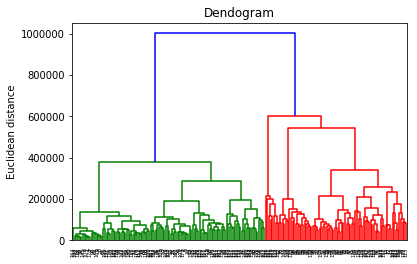

(198, 16063)

In [186]:
#Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
#use only 2 genes
data = X_test_pca[:, -2:]
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendogram')
plt.ylabel('Euclidean distance')
plt.show()
X.shape  

In [191]:
# create for loop to check the quality of clusters for different number of clusters
n_clusters = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
homogeneity_scores = []
for n in n_clusters:
    cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')  
    homogeneity_scores.append(homogeneity_score(Y_test.flatten() ,cluster.fit_predict(data)))
print("Number of clusters used:\n", n_clusters, "\n")
print("corresponding homogeneneity scores:\n", homogeneity_scores, "\n")

Number of clusters used:
 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 

corresponding homogeneneity scores:
 [0.26956002057944384, 0.28123168999227216, 0.2924866259695712, 0.3137819943856014, 0.34560000873183544, 0.3818739370458149, 0.4019611222640889, 0.41808870564466266, 0.4523634626719182, 0.4561151079976844, 0.480242294159836, 0.5100611372193459, 0.5246442030728112, 0.5445234317791513, 0.5544630461323212, 0.5785902322944729] 



<function matplotlib.pyplot.show(*args, **kw)>

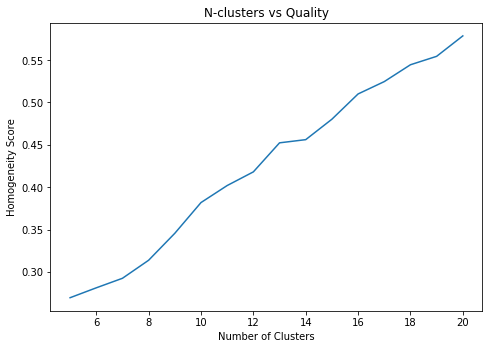

In [192]:
#plot the Number of Clusters vs homogeneity_scores to check for the best cluster orientation
fig = plt.figure()
ax = fig.add_axes([0.2,0.2,1,1])
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Homogeneity Score')
ax.set_title('N-clusters vs Quality')
ax.plot(n_clusters, homogeneity_scores)
plt.show

As the number of clusters increases, the homogeniety score increase

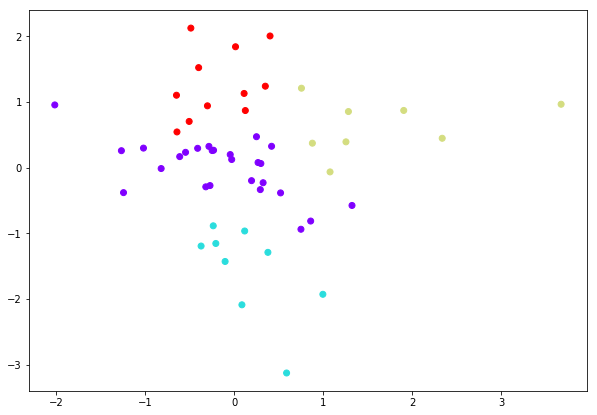

In [195]:
# plot the clusters to see how actually our data has been clustered using 4 clusters:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)
plt.figure(figsize=(10, 7)) 
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow') 